In [1]:
#MatplotLib magic command
%matplotlib inline
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
#File to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'
#Read the city data file and store it in pd DF
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [3]:
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
#Check for null values
city_data_df.isna().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
#Dtypes
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [7]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#Number of data point from Urban cities
sum(city_data_df['type']=='Urban')

66

In [10]:
#Number of data point from Suburban cities
sum(city_data_df['type']=='Suburban')

36

In [11]:
#Number of data point from Rural cities
sum(city_data_df['type']=='Rural')

18

In [12]:
#Check for null
ride_data_df.isna().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# Merge the two DF
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on='city')
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
pyber_data_df['type']=pyber_data_df['type'].astype(str)

In [16]:
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [17]:
#Average fare per type
avg_fare_city_type = pyber_data_df.groupby(['type','city']).mean()['fare']
avg_fare_city_type

type   city               
Rural  Bradshawfurt           40.064000
       Garzaport              24.123333
       Harringtonfort         33.470000
       Jessicaport            36.013333
       Lake Jamie             34.358333
                                ...    
Urban  West Patrickchester    28.233125
       West Robert            25.123871
       West Samuelburgh       21.767600
       Williamsstad           24.362174
       Williamsview           26.599000
Name: fare, Length: 120, dtype: float64

In [18]:
# Create DataFrames by type
urban_cities_df = pyber_data_df[pyber_data_df['type']== 'Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type']== 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type']== 'Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [19]:
# Number of rides for each city by type
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [20]:
# Average fare per city
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [21]:
#Avg number of riders for each city by type
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

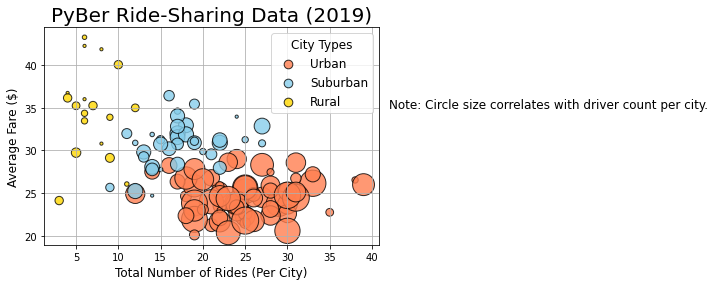

<Figure size 432x288 with 0 Axes>

In [22]:
#Scatter plot Urban cities

plt.scatter(urban_ride_count, urban_avg_fare, s= 10*urban_driver_count, 
            c= 'coral', edgecolor='black', linewidths=1, alpha=0.8,label='Urban')

#Scatter plot Suburban cities

plt.scatter(suburban_ride_count, suburban_avg_fare, s= 10*suburban_driver_count, 
            c= 'skyblue', edgecolor='black', linewidths=1, alpha=0.8,label='Suburban')

#Scatter plot Rural cities

plt.scatter(rural_ride_count, rural_avg_fare, s= 10*rural_driver_count, 
            c= 'gold', edgecolor='black', linewidths=1, alpha=0.8,label='Rural')

#Graph properties
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.grid(True)
#Create a legend
lgnd = plt.legend(fontsize='12', mode='Expanded', scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
#plt.legend()
# Note to specify label about circle size
plt.text(42,35,'Note: Circle size correlates with driver count per city.', fontsize='12' )
#Show plot
plt.show()
#Save figure
plt.savefig('analysis/fig1.png')

In [23]:
# Summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [24]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [25]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [26]:
# Mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [27]:
# Mode of the ride count for each city type.
suburban_ride_count.mode()

0    17
dtype: int64

In [28]:
# Calculate the measures of central tendency for the ride count for the urban cities.
#Urban
print('Urban')
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")
#Suburban
print('Suburban')
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")
#Rurabl
print('Rural')
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

Urban
The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
Suburban
The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 24.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
Rural
The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 24.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [29]:
# Fares for each city type.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [30]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
mean_suburban_fares = np.mean(suburban_fares)
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}. The mean fare price for suburban trips is ${mean_suburban_fares:.2f}. The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
median_suburban_fares = np.median(suburban_fares)
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}. The median fare price for suburban trips is ${median_suburban_fares:.2f}.  The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
mode_suburban_fares = sts.mode(suburban_fares)
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}. For suburban is {mode_suburban_fares}. For rural is {mode_rural_fares}")

The mean fare price for urban trips is $24.53. The mean fare price for suburban trips is $30.97. The mean fare price for rural trips is $34.62.
The median fare price for urban trips is $24.64. The median fare price for suburban trips is $30.75.  The median fare price for rural trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])). For suburban is ModeResult(mode=array([17.99]), count=array([3])). For rural is ModeResult(mode=array([37.05]), count=array([2]))


In [31]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
mean_suburban_drivers = np.mean(suburban_drivers)
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean for drivers in urban: {mean_urban_drivers:.0f}. For suburban: {mean_suburban_drivers:.0f}. For rural: {mean_rural_drivers:.0f}.")

median_urban_drivers = np.median(urban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
median_rural_drivers = np.median(rural_drivers)
print(f"The median for drivers in urban: {median_urban_drivers}. For suburban: {median_suburban_drivers}.  For rural: {median_rural_drivers}.")

mode_urban_drivers = sts.mode(urban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode for drivers in urban: {mode_urban_drivers}. For suburban is {mode_suburban_drivers}. For rural is {mode_rural_drivers}")


The mean for drivers in urban: 37. For suburban: 14. For rural: 4.
The median for drivers in urban: 37.0. For suburban: 16.0.  For rural: 4.0.
The mode for drivers in urban: ModeResult(mode=array([39], dtype=int64), count=array([86])). For suburban is ModeResult(mode=array([20], dtype=int64), count=array([79])). For rural is ModeResult(mode=array([1], dtype=int64), count=array([32]))


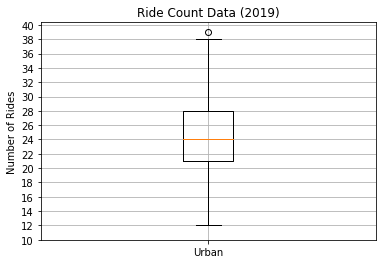

In [32]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

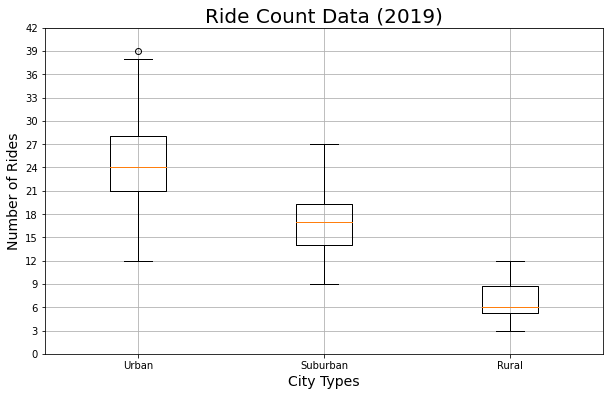

In [33]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [34]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


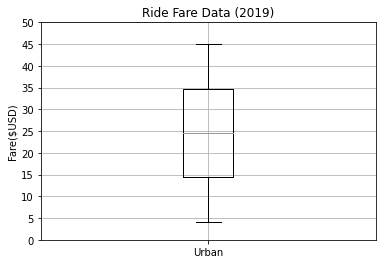

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [35]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

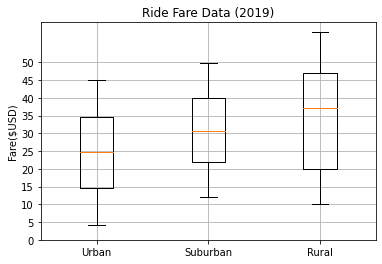

In [36]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban", "Suburban","Rural"]

fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(fares_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.savefig("analysis/Fig3.png")
plt.show()


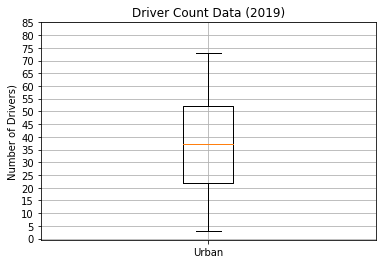

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [37]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

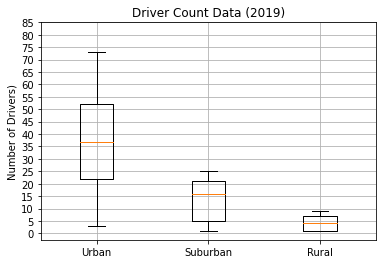

In [38]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels =  ["Urban", "Suburban","Rural"]
drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(drivers_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.savefig("analysis/Fig4.png")
plt.show()